In [93]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [6]:
TEST_MD = pd.read_csv("output_atoms_VEL.csv")

In [7]:
TEST_MD

,Structure,Atom,r_ffio_x_vel,r_ffio_y_vel,r_ffio_z_vel,r_m_charge1,r_m_charge2,r_m_x_coord,r_m_y_coord,r_m_z_coord
0,1,1,2.329198,-1.625443,-5.917747,-0.21498,-0.21498,0.006858,-0.032067,-0.015857
1,1,2,22.366474,5.094727,-1.848687,0.05374,0.05374,0.056678,0.419359,-1.006732
2,1,3,-15.409673,0.558480,-7.733492,0.05374,0.05374,-0.130920,-1.112314,0.030874
3,1,4,-8.635928,-8.871945,10.794622,0.05374,0.05374,0.871864,0.137669,0.625278
4,1,5,-2.403052,-12.445816,1.570997,0.05374,0.05374,-0.804480,0.587354,0.366437
...,...,...,...,...,...,...,...,...,...,...
2123,3,1055,-4.925860,-1.185286,-1.519115,0.41700,0.41700,0.295184,-7.516507,-1.472888
2124,3,1056,-10.957940,18.802876,2.793555,0.41700,0.41700,-1.156740,-7.939197,-1.544615
2125,3,1057,-2.341909,-7.132238,4.235473,-0.83400,-0.83400,10.519471,-4.077864,2.092215
2126,3,1058,-9.543792,-6.428347,7.292269,0.41700,0.41700,10.297332,-4.951399,1.769999


In [12]:
X_Vel = TEST_MD["r_ffio_x_vel"]
Y_Vel = TEST_MD["r_ffio_y_vel"]
Z_Vel = TEST_MD["r_ffio_z_vel"]

In [15]:
X_Vel[0]

2.32919836044312

In [20]:
len(X_Vel)

2128

In [31]:
Vel = []
for i in range(0,len(X_Vel)):
    XYZ2 = X_Vel[i]**2+Y_Vel[i]**2+Z_Vel[i]**2
    XYZ = math.sqrt(XYZ2)
    Vel.append(XYZ)

In [55]:
data = []
for i in range(0,len(X_Vel)):
    XYZ2 = X_Vel[i]**2+Y_Vel[i]**2+Z_Vel[i]**2
    XYZ = math.sqrt(XYZ2)
    data.append(XYZ)

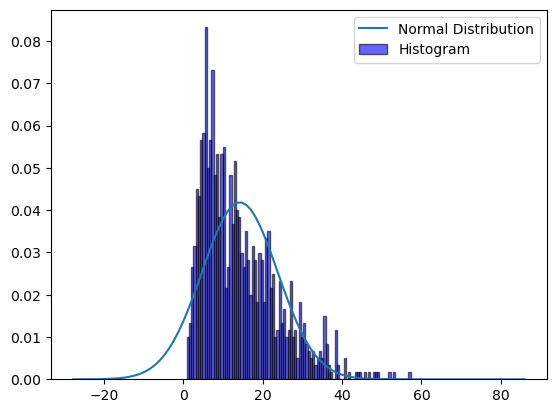

In [56]:
# 리스트에 있는 값
#data = [1, 2, 2, 3, 4, 4, 4, 4, 5, 6]

# 리스트 값의 평균과 표준편차 계산
mean = np.mean(data)
std_dev = np.std(data)

# 정규 분포 함수 정의
def normal_distribution(x, mean, std_dev):
    return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * std_dev ** 2))

# x축 값의 범위 설정
x = np.linspace(min(data) - 3 * std_dev, max(data) + 3 * std_dev, 100)

# 정규 분포 그리기
plt.plot(x, normal_distribution(x, mean, std_dev), label="Normal Distribution")
plt.hist(data, bins=100, density=True, alpha=0.6, color='b', edgecolor='k', label="Histogram")

plt.legend()
plt.show()

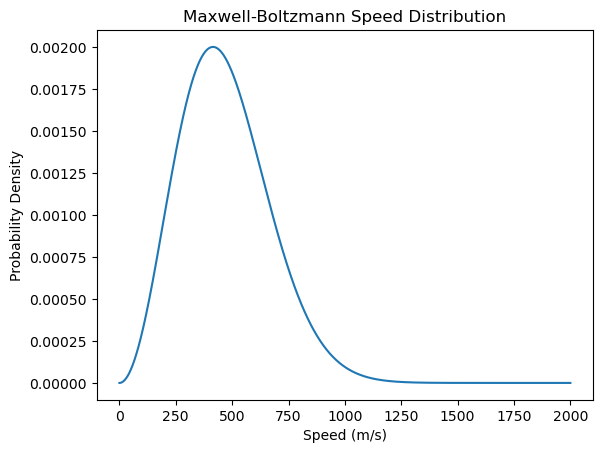

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann, m_u
from scipy.stats import maxwell

# 매개변수 설정
temperature = 300  # 켈빈(K) 단위의 온도
mass = 28.97 * m_u  # 질량 (예: 질소 분자 질량, 28.97 u)

# 맥스웰-볼츠만 속도 분포 파라미터 계산
scale_parameter = np.sqrt(Boltzmann * temperature / mass)

# 속도 범위 정의
velocities = np.linspace(0, 2000, 1000)

# 맥스웰-볼츠만 속도 분포 계산
distribution = maxwell.pdf(velocities, scale=scale_parameter)

# 그래프 그리기
plt.plot(velocities, distribution)
plt.xlabel('Speed (m/s)')
plt.ylabel('Probability Density')
plt.title('Maxwell-Boltzmann Speed Distribution')
plt.show()


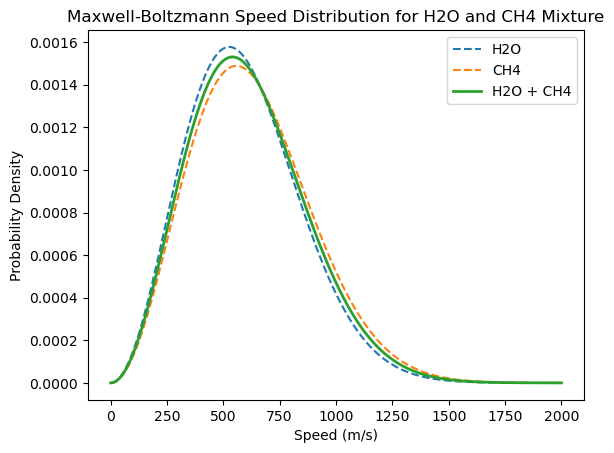

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann, m_u
from scipy.stats import maxwell

def maxwell_boltzmann(velocities, temperature, mass):
    scale_parameter = np.sqrt(Boltzmann * temperature / mass)
    return maxwell.pdf(velocities, scale=scale_parameter)

# 매개변수 설정
temperature = 300  # 켈빈(K) 단위의 온도
mass_h2o = (2 * 1.008 + 15.999) * m_u  # 물분자 질량 (H2O)
mass_ch4 = (12.011 + 4 * 1.008) * m_u  # 메탄 분자 질량 (CH4)

# 속도 범위 정의
velocities = np.linspace(0, 2000, 1000)

# 물분자와 메탄의 개별 맥스웰-볼츠만 속도 분포 계산
distribution_h2o = maxwell_boltzmann(velocities, temperature, mass_h2o)
distribution_ch4 = maxwell_boltzmann(velocities, temperature, mass_ch4)

# 두 물질의 분포를 가중치를 적용하여 합침 (여기서는 개수가 같다고 가정)
combined_distribution = 0.5 * distribution_h2o + 0.5 * distribution_ch4

# 그래프 그리기
plt.plot(velocities, distribution_h2o, label='H2O', linestyle='--')
plt.plot(velocities, distribution_ch4, label='CH4', linestyle='--')
plt.plot(velocities, combined_distribution, label='H2O + CH4', linewidth=2)

plt.xlabel('Speed (m/s)')
plt.ylabel('Probability Density')
plt.title('Maxwell-Boltzmann Speed Distribution for H2O and CH4 Mixture')
plt.legend()
plt.show()


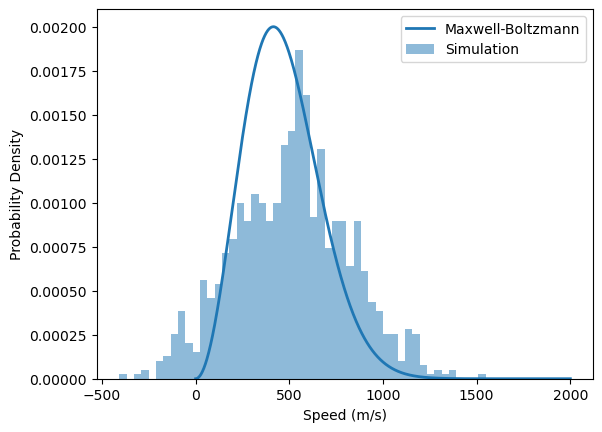

K-S statistic: 0.14328
P-value: 0.00000
Reject the null hypothesis: The distributions are significantly different.


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann, m_u
from scipy.stats import maxwell, kstest

simulation_velocities = np.random.normal(loc=500, scale=300, size=1000)

# 매개변수 설정
temperature = 300  # 켈빈(K) 단위의 온도
mass = 28.97 * m_u  # 예시: 질소 원자의 질량 (N2)

# 속도 범위 정의
velocities = np.linspace(0, 2000, 1000)

# 맥스웰-볼츠만 속도 분포 계산
distribution_theory = maxwell_boltzmann(velocities, temperature, mass)

# MD 시뮬레이션 속도 데이터의 히스토그램
hist, bin_edges = np.histogram(simulation_velocities, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 이론적인 맥스웰-볼츠만 분포와 시뮬레이션 결과 비교
plt.plot(velocities, distribution_theory, label="Maxwell-Boltzmann", linewidth=2)
plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], alpha=0.5, label="Simulation")
plt.xlabel("Speed (m/s)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# 콜모고로프-스미르노프 검정
# 시뮬레이션 결과를 이론적 분포와 비교하기 전에 데이터를 정규화
normalized_sim_velocities = simulation_velocities / np.sqrt(Boltzmann * temperature / mass)
statistic, p_value = kstest(normalized_sim_velocities, "maxwell")

print(f"K-S statistic: {statistic:.5f}")
print(f"P-value: {p_value:.5f}")

alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: The distributions are not significantly different.")
else:
    print("Reject the null hypothesis: The distributions are significantly different.")


In [51]:
simulation_velocities = np.random.normal(loc=500, scale=300, size=1000)

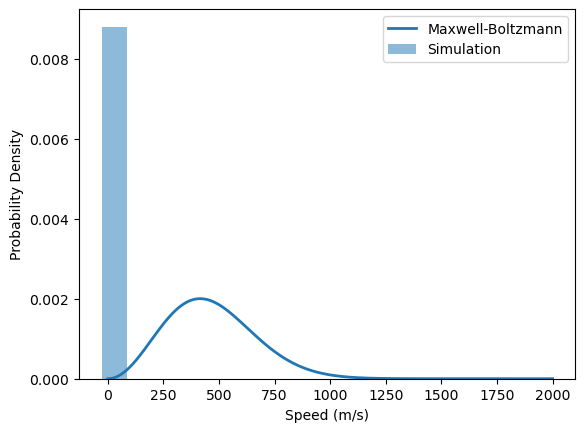

K-S statistic: 0.99350
P-value: 0.00000
Reject the null hypothesis: The distributions are significantly different.


In [64]:
data = []
for i in range(0,len(X_Vel)):
    XYZ2 = X_Vel[i]**2+Y_Vel[i]**2+Z_Vel[i]**2
    XYZ = math.sqrt(XYZ2)
    data.append(XYZ)
    
mean = np.mean(data)
std_dev = np.std(data)

# 정규 분포 함수 정의
def normal_distribution(x, mean, std_dev):
    return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * std_dev ** 2))

# x축 값의 범위 설정
MD_VEL = np.linspace(min(data) - 3 * std_dev, max(data) + 3 * std_dev, 100)

simulation_velocities = MD_VEL

# 매개변수 설정
temperature = 300  # 켈빈(K) 단위의 온도
mass_h2o = (2 * 1.008 + 15.999) * m_u  # 물분자 질량 (H2O)

# 속도 범위 정의
velocities = np.linspace(0, 2000, 1000)

# 맥스웰-볼츠만 속도 분포 계산
distribution_theory = maxwell_boltzmann(velocities, temperature, mass)

# MD 시뮬레이션 속도 데이터의 히스토그램
hist, bin_edges = np.histogram(simulation_velocities, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 이론적인 맥스웰-볼츠만 분포와 시뮬레이션 결과 비교
plt.plot(velocities, distribution_theory, label="Maxwell-Boltzmann", linewidth=2)
plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], alpha=0.5, label="Simulation")
plt.xlabel("Speed (m/s)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# 콜모고로프-스미르노프 검정
# 시뮬레이션 결과를 이론적 분포와 비교하기 전에 데이터를 정규화
normalized_sim_velocities = simulation_velocities / np.sqrt(Boltzmann * temperature / mass)
statistic, p_value = kstest(normalized_sim_velocities, "maxwell")

print(f"K-S statistic: {statistic:.5f}")
print(f"P-value: {p_value:.5f}")

alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: The distributions are not significantly different.")
else:
    print("Reject the null hypothesis: The distributions are significantly different.")


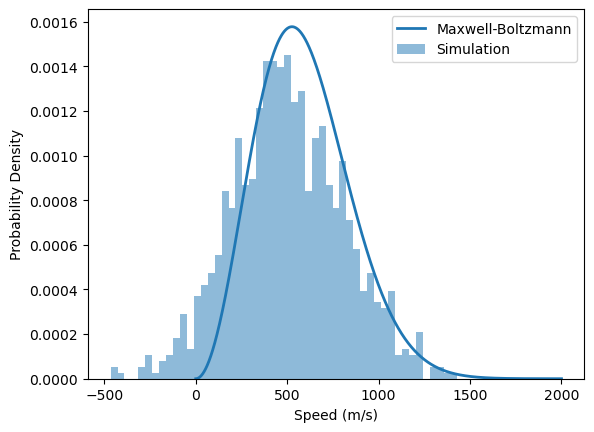

K-S statistic: 0.14131
P-value: 0.00000
Reject the null hypothesis: The distributions are significantly different.


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann, m_u
from scipy.stats import maxwell, kstest

simulation_velocities = np.random.normal(loc=500, scale=300, size=1000)

# 매개변수 설정
temperature = 300  # 켈빈(K) 단위의 온도
mass_h2o = (2 * 1.008 + 15.999) * m_u  # 물분자 질량 (H2O)

# 속도 범위 정의
velocities = np.linspace(0, 2000, 1000)

# 맥스웰-볼츠만 속도 분포 계산
distribution_theory = maxwell_boltzmann(velocities, temperature, mass_h2o)

# MD 시뮬레이션 속도 데이터의 히스토그램
hist, bin_edges = np.histogram(simulation_velocities, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 이론적인 맥스웰-볼츠만 분포와 시뮬레이션 결과 비교
plt.plot(velocities, distribution_theory, label="Maxwell-Boltzmann", linewidth=2)
plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], alpha=0.5, label="Simulation")
plt.xlabel("Speed (m/s)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# 콜모고로프-스미르노프 검정
# 시뮬레이션 결과를 이론적 분포와 비교하기 전에 데이터를 정규화
normalized_sim_velocities = simulation_velocities / np.sqrt(Boltzmann * temperature / mass_h2o)
statistic, p_value = kstest(normalized_sim_velocities, "maxwell")

print(f"K-S statistic: {statistic:.5f}")
print(f"P-value: {p_value:.5f}")

alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: The distributions are not significantly different.")
else:
    print("Reject the null hypothesis: The distributions are significantly different.")


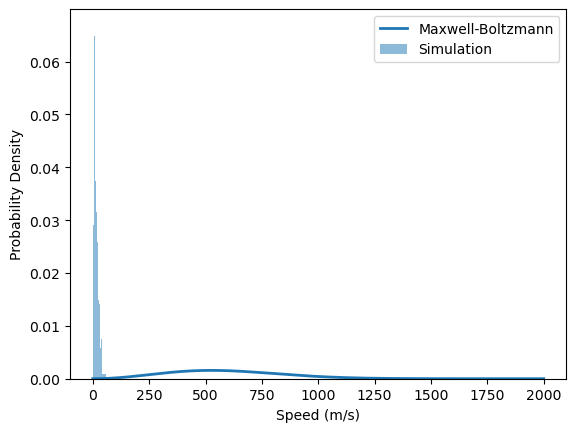

K-S statistic: 0.99904
P-value: 0.00000
Reject the null hypothesis: The distributions are significantly different.


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann, m_u
from scipy.stats import maxwell, kstest

# CSV 파일에서 데이터 읽기
file_path = "output_atoms_VEL.csv" 
data = pd.read_csv(file_path)

# 각 원자의 속도 크기 계산
speeds = np.sqrt(data["X_vel"]**2 + data["Y_vel"]**2 + data["Z_vel"]**2)

# 매개변수 설정
temperature = 300  # 켈빈(K) 단위의 온도
mass_h2o = (2 * 1.008 + 15.999) * m_u  # 물분자 질량 (H2O)

# 속도 범위 정의
velocities = np.linspace(0, 2000, 1000)

# 맥스웰-볼츠만 속도 분포 계산
distribution_theory = maxwell_boltzmann(velocities, temperature, mass_h2o)

# MD 시뮬레이션 속도 데이터의 히스토그램
hist, bin_edges = np.histogram(speeds, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 이론적인 맥스웰-볼츠만 분포와 시뮬레이션 결과 비교
plt.plot(velocities, distribution_theory, label="Maxwell-Boltzmann", linewidth=2)
plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], alpha=0.5, label="Simulation")
plt.xlabel("Speed (m/s)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# 콜모고로프-스미르노프 검정
# 시뮬레이션 결과를 이론적 분포와 비교하기 전에 데이터를 정규화
normalized_sim_speeds = speeds / np.sqrt(Boltzmann * temperature / mass_h2o)
statistic, p_value = kstest(normalized_sim_speeds, "maxwell")

print(f"K-S statistic: {statistic:.5f}")
print(f"P-value: {p_value:.5f}")

alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: The distributions are not significantly different.")
else:
    print("Reject the null hypothesis: The distributions are significantly different.")
